In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pnd
import math

import os

In [10]:
numberOfCars = 0
numberOfPeds = 0

numberOfTruncatedCars = 0
numberOfOccludedCars = 0

numberOfTruncatedPeds = 0
numberOfOccludedPeds = 0

numberOfLabels = 0

# rootDir = "../../BonsDados-backup/GTAtoKITTI/kitti/data_object_label_2/training/label_2/"

rootDir = "../../MaterialHash/GTAtoKITTI/kitti/training/label_2/"

for subdir, dirs, files in os.walk(rootDir):
    # print(files)
    for file in files:
        # print(file)
        with open(rootDir+file, 'r') as f: 
            data = f.read()
            numberOfLabels += 1
            for line in data.split("\n"):
                newData = line.split(' ')
                try:
                    # print(float(newData[1]))
                    if "Car" == newData[0]:
                        numberOfCars += 1
                        if 0 < float(newData[1]):
                            numberOfTruncatedCars += 1
                        if 0 < float(newData[2]):
                            numberOfOccludedCars += 1
                        # print(newData)
                    elif "Pedestrian" == line.split(' ')[0]:
                        numberOfPeds +=1
                        if 0 < float(newData[1]):
                            numberOfTruncatedPeds += 1
                        if 0 < float(newData[2]):
                            numberOfOccludedPeds += 1
                        # print(newData)
                except IndexError:
                    continue
        # break

# rootDir = "../../BonsDados-backup/GTAtoKITTI/kitti/data_object_label_2/testing/label_2/"

rootDir = "../../MaterialHash/GTAtoKITTI/kitti/testing/label_2/"


for subdir, dirs, files in os.walk(rootDir):
    # print(files)
    for file in files:
        # print(file)
        with open(rootDir+file, 'r') as f: 
            numberOfLabels += 1
            data = f.read()
            for line in data.split("\n"):
                newData = line.split(' ')
                try:
                    # print(float(newData[1]))
                    if "Car" == newData[0]:
                        numberOfCars += 1
                        if 0 < float(newData[1]):
                            numberOfTruncatedCars += 1
                        if 0 < float(newData[2]):
                            numberOfOccludedCars += 1
                        # print(newData)
                    elif "Pedestrian" == line.split(' ')[0]:
                        numberOfPeds +=1
                        if 0 < float(newData[1]):
                            numberOfTruncatedPeds += 1
                        if 0 < float(newData[2]):
                            numberOfOccludedPeds += 1
                        # print(newData)
                except IndexError:
                    continue

In [3]:
print(numberOfCars)
print(numberOfTruncatedCars)
print(numberOfOccludedCars)

print(numberOfPeds)
print(numberOfTruncatedPeds)
print(numberOfOccludedPeds)

print(numberOfLabels)

# number = int(math.ceil(numberOfCars / 1000.0)) * 1000
# print(number)

39469
9987
15284
11969
1374
5232
14999


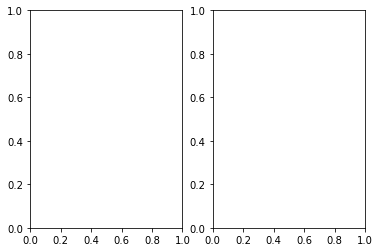

In [15]:
figure, (ax1, ax2) = plt.subplots(1, 2)

[    0.  8000. 16000. 24000. 32000.]
2.948501438248121


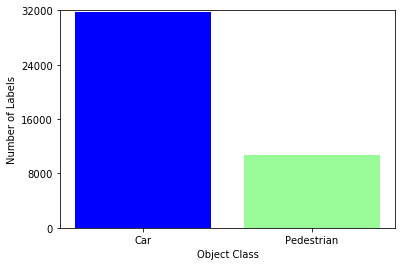

In [27]:
number = int(math.ceil(numberOfCars / 1000.0)) * 1000

plt.bar(1, numberOfCars, color='blue', edgecolor="black")
plt.bar(2, numberOfPeds, color='palegreen')

ytick = np.arange(0, number+number/4, number/4)

print(ytick)

plt.xticks([1,2], ["Car", "Pedestrian"])
plt.ylim(0,number)
plt.yticks(ytick, ['%d' % val for val in ytick])
plt.ylabel("Number of Labels")
plt.xlabel("Object Class")

plt.savefig("NumberOfLabels-ObjectClass.png",bbox_inches='tight')


print(numberOfCars/numberOfPeds)
#
# Diminuindo dens de veiculos

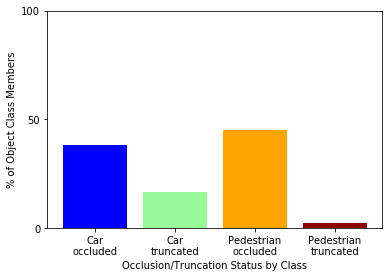

In [30]:
plt.bar(1, (numberOfOccludedCars/numberOfCars)*100, color = "blue")
plt.bar(2, (numberOfTruncatedCars/numberOfCars)*100, color = "palegreen")
plt.bar(3, (numberOfOccludedPeds/numberOfPeds)*100, color = "orange")
plt.bar(4, (numberOfTruncatedPeds/numberOfCars)*100, color = "darkred")

plt.ylim(0,100)
plt.yticks([0,50,100])
plt.xticks([1,2,3,4], ["Car\noccluded", "Car\ntruncated", "Pedestrian\noccluded", "Pedestrian\ntruncated"])
plt.ylabel("% of Object Class Members")
plt.xlabel("Occlusion/Truncation Status by Class")

plt.savefig("OfObjectClassMembers-Occlusion_TruncationStatusByClass.png",bbox_inches='tight')

# Diminuindo dens de veiculos < numberOfOccludedPeds